<a href="https://colab.research.google.com/github/Usis075419/Programacion-_III/blob/main/guia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrenar una IA que aprenda a leer  numeros del 0-9 

In [4]:
#importar librerias 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import math 
import tensorflow_datasets as tfds 



In [5]:
#cargamos nuestra dataset en variables 
dataset, metadata = tfds.load("mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset ['train'],dataset['test']


In [6]:
#etiquetas de los datos que son 10 
numero_lentras = ['cero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve']

In [7]:
#4 obtener la cantidad de datos de entrenamiento y prueba 
print(metadata.splits["train"].num_examples)
numeros_ejemplo_entrenamiento = metadata.splits['train'].num_examples
numeros_ejemplo_prueba= metadata.splits['test'].num_examples


60000


In [8]:
#5 funcion normalizadora 
def normalizacion(img,labels):
  img = tf.cast(img,tf.float32)
  img /=255 #150/255 = 0.58
  return img,labels 


In [9]:
#llamar la funcion normalizadora
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

#datos_entrenamiento = datos_entrenamiento.map(normalizacion)

In [10]:
#arquitectura de red neuronal 
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),#capa de entrada 
    tf.keras.layers.Dense(64, activation=tf.nn.relu),#capa oculta con 64 neuronas
    tf.keras.layers.Dense(64, activation=tf.nn.relu), #capa oculta con 64 neuronas
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)#capa de salida de 10 neuronas
])

In [11]:
#compilar el modelo
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
#entrenamiento por  lote
size_lote = 32
datos_entrenamiento= datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(size_lote)
datos_prueba= datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch (size_lote)

In [13]:
#realizar entrenamiento
modelo.fit(datos_entrenamiento, epochs=5,
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/size_lote))


Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.2771 - accuracy: 0.9184
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1225 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0680 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0583 - accuracy: 0.9818


In [ ]:
#evaluamos el aprendizaje
test_loss, test_accuracy = modelo.evaluate(datos_prueba,steps=math.ceil(numeros_ejemplo_prueba/size_lote))
print("resltados de la pruebas", test_loss,test_accuracy)

3 3


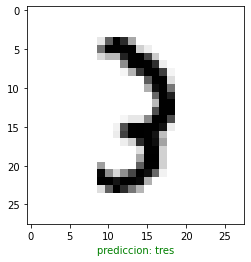

In [18]:
#15. Hacer una 
i=0
for miImg,etiqueta in datos_entrenamiento.take(1):
  etiqueta = etiqueta.numpy()
  img= miImg[i].numpy().reshape(1,28,28,1)
  prediccion = modelo.predict(img,batch_size=1)

  valor_predicho = np.argmax(prediccion)
  print(valor_predicho,etiqueta[i])

  plt.grid(False)
  plt.imshow(img[0,...,0], cmap=plt.cm.binary)
  plt.xlabel("prediccion: {}".format(numero_lentras[valor_predicho]), color="green")
